In [87]:
import numpy as np
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval
from Turbinen_class_file import Francis_turbine_class
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#importing pressure conversion function
import sys
import os
current = os.path.dirname(os.path.realpath('messy.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion
%matplotlib widget

In [88]:
T1 = Francis_turbine_class()
csv = T1.raw_csv

T1.extract_csv()
ps  = T1.raw_ps_vec
LAs = T1.raw_LA_vec
Qs  = T1.raw_Qs_mat

Q_fun = T1.get_Q_fun()

In [89]:
p_min = np.min(ps)
p_max = np.max(ps)

n_p = 100
n_LA = 200

ps_vec = np.linspace(p_min,p_max,n_p)
ind1 = np.argmin(np.abs(ps_vec-np.min(ps)))
ind2 = np.argmin(np.abs(ps_vec-np.max(ps)))
LA_vec = np.linspace(0,1,n_LA)

Q_int = np.reshape(Q_fun(ps_vec,LA_vec),[n_LA,n_p])

In [90]:
poly_deg = 7
n_LAs = np.size(LAs)
fit_coeff_mat = np.empty([n_LAs,poly_deg+1])
fit_weights = np.ones_like(ps)
fit_weights[0] = 1000

for i in range(n_LAs):
    x = ps
    y = Qs[i,:]
    fit_coeff_mat[i,:] = np.polynomial.polynomial.Polynomial.fit(x,y,poly_deg,w=fit_weights).convert().coef



In [91]:
Qs_poly = np.empty([n_LAs,n_p])
for i in range(n_LAs):
    Qs_poly[i,:] = polyval(ps_vec,fit_coeff_mat[i,:])

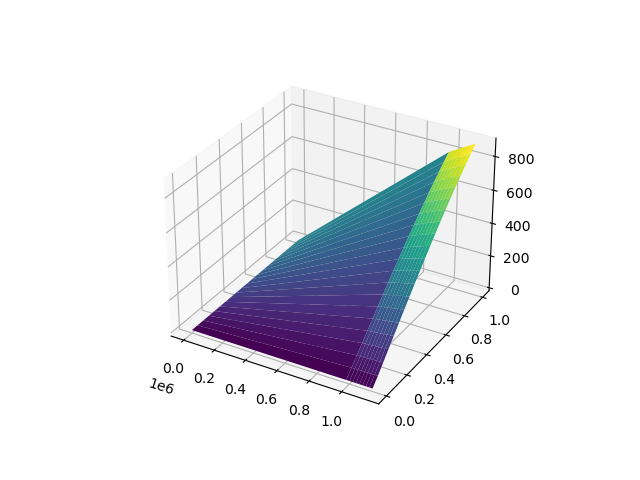

In [92]:
XX1,YY1 = np.meshgrid(ps,LAs)

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot_surface(XX1, YY1, Qs,cmap='viridis', edgecolor='none')

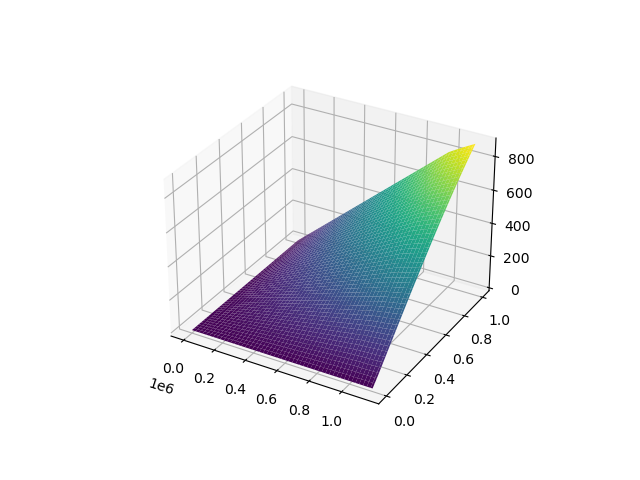

In [93]:
XX2,YY2 = np.meshgrid(ps_vec,LA_vec)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

ax2.plot_surface(XX2, YY2, Q_int,cmap='viridis', edgecolor='none')

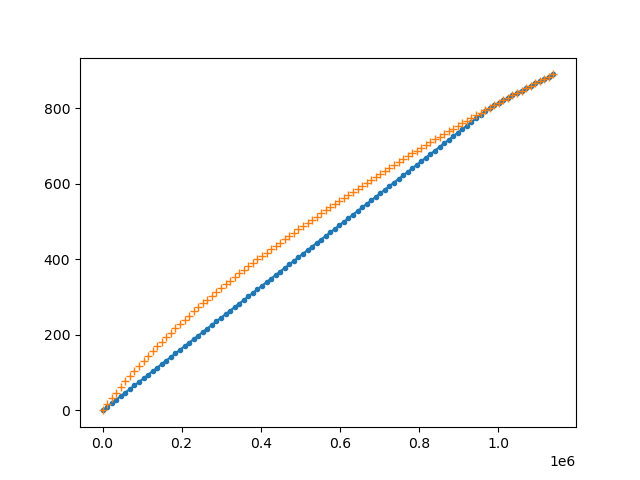

In [94]:
fig3 = plt.figure()
ax3 = plt.axes()

# ax3.scatter(XX1[-1,:], (Qs[-1,:]-((XX1[-1,:]-XX1[-1,0])/(XX1[-1,-1]-XX1[-1,0])*(Qs[-1,-1]-Qs[-1,0])+Qs[-1,0])))
# ax3.scatter(XX2[-1,:], (Q_int[-1,:]-((XX2[-1,:]-XX2[-1,ind1])/(XX2[-1,ind2]-XX2[-1,ind1])*(Q_int[-1,ind2]-Q_int[-1,0])+Q_int[-1,ind1])))
ax3.plot(XX2[-1,:], Q_int[-1,:],'.-')
ax3.plot(ps_vec, Qs_poly[-1,:],'+')

